# Data exploration and visualization

In [80]:
!pip3 install scikit-learn


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [81]:
from sklearn import datasets
iris = datasets.load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

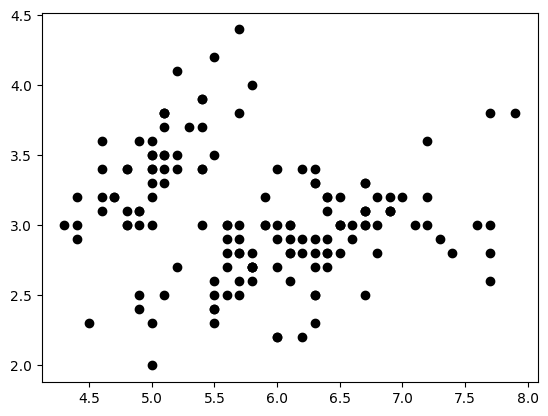

(150, 1)

In [82]:
import numpy as np
import matplotlib.pyplot as plt
sl = iris.data[:,0].reshape(-1,1)
sw = iris.data[:,1].reshape(-1,1)
plt.plot(sl, sw, 'ok')
plt.show()
sl.shape

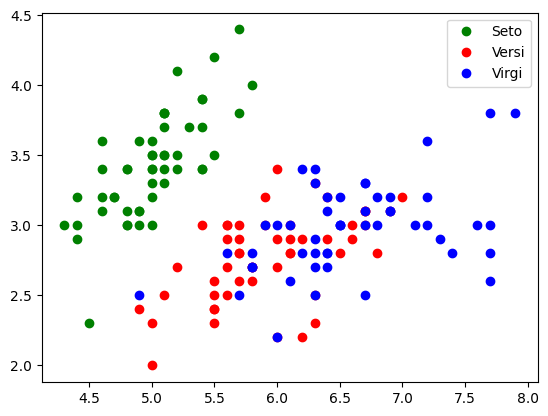

In [83]:
tg = iris.target
tg.shape
plt.plot(sl[tg==0,0], sw[tg==0,0], 'og', label="Seto")
plt.plot(sl[tg==1,0], sw[tg==1,0], 'or', label="Versi")
plt.plot(sl[tg==2,0], sw[tg==2,0], 'ob', label="Virgi")
plt.legend()
plt.show()

# Binary classifier with one parameter

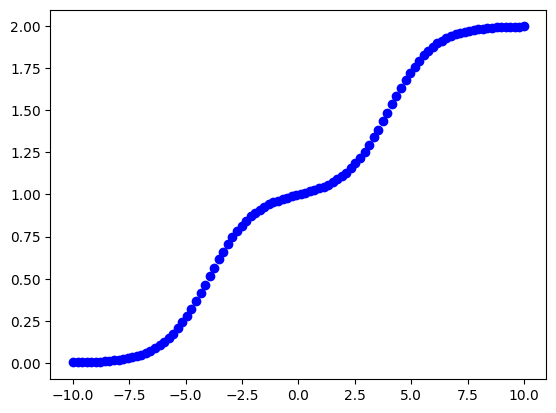

In [ ]:
z = np.linspace(-10, 10, 100)
sig = 1/(1+np.exp(-z-4)) + 1/(1+np.exp(-z+4))
plt.plot(z, sig, 'ob')
plt.show()

# First classifier
$$z = \theta_1\times x_1 + \theta_0$$

In [149]:
pw = iris.data[:, 3].reshape(-1,1)
X = np.c_[np.ones_like(pw), pw]
y = (iris.target==0).astype(int).reshape(-1,1) #Setosa 

In [150]:
def sigmoid(z):
    #z = np.clip(z, -50, 50)
    sig = 1/(1+np.exp(-z))
    return sig

In [151]:
def logLoss(y, yModel):
    #yModel = np.clip(yModel, 1e-12, 1-1e-12)
    loss = -np.mean(y*np.log(yModel)+(1-y)*np.log(1-yModel))
    return loss

In [172]:
# Gradient descent
lr = 0.1
epochs = 5000
m = X.shape[0]
np.random.seed(10)
theta = np.random.rand(2,1)
theta

array([[0.77132064],
       [0.02075195]])

In [173]:
xNew = np.linspace(-1,3, m)
Xnew = np.c_[np.ones_like(xNew), xNew]
losses = []

for i in range(epochs):
    z = X@theta
    h = sigmoid(z)
    grad = (X.T@(h-y))/m
    theta = theta - lr*grad
    lossValue = logLoss(y, h)
    losses.append(lossValue)
    if(i%100==0):
        print(f"Epoch {i:4d}, Loss: {lossValue:.6f}")
theta

Epoch    0, Loss: 0.909705
Epoch  100, Loss: 0.262854
Epoch  200, Loss: 0.194549
Epoch  300, Loss: 0.154778
Epoch  400, Loss: 0.128995
Epoch  500, Loss: 0.110967
Epoch  600, Loss: 0.097650
Epoch  700, Loss: 0.087403
Epoch  800, Loss: 0.079264
Epoch  900, Loss: 0.072636
Epoch 1000, Loss: 0.067129
Epoch 1100, Loss: 0.062475
Epoch 1200, Loss: 0.058488
Epoch 1300, Loss: 0.055030
Epoch 1400, Loss: 0.052002
Epoch 1500, Loss: 0.049325
Epoch 1600, Loss: 0.046941
Epoch 1700, Loss: 0.044803
Epoch 1800, Loss: 0.042874
Epoch 1900, Loss: 0.041124
Epoch 2000, Loss: 0.039528
Epoch 2100, Loss: 0.038066
Epoch 2200, Loss: 0.036723
Epoch 2300, Loss: 0.035482
Epoch 2400, Loss: 0.034334
Epoch 2500, Loss: 0.033267
Epoch 2600, Loss: 0.032273
Epoch 2700, Loss: 0.031345
Epoch 2800, Loss: 0.030475
Epoch 2900, Loss: 0.029660
Epoch 3000, Loss: 0.028892
Epoch 3100, Loss: 0.028169
Epoch 3200, Loss: 0.027486
Epoch 3300, Loss: 0.026840
Epoch 3400, Loss: 0.026227
Epoch 3500, Loss: 0.025647
Epoch 3600, Loss: 0.025094
E

array([[ 5.73789762],
       [-7.93887721]])

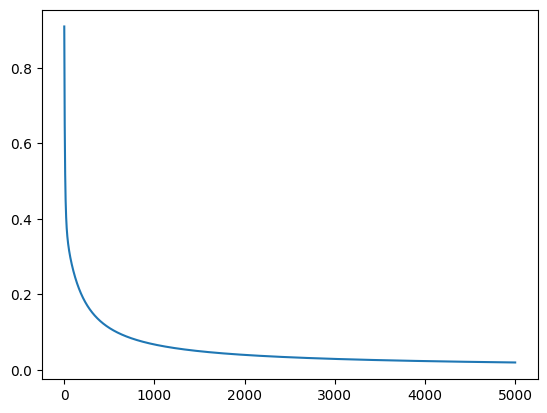

In [174]:
plt.plot(losses)

In [175]:
xNew = np.linspace(-0.5,3, m)
Xnew = np.c_[np.ones_like(xNew), xNew]
yMod = sigmoid(Xnew@theta)
yJitter = y+np.random.uniform(-0.1, 0.1, size=y.shape)
logloss = logLoss(y, sigmoid(X@theta))
print(logloss)

0.019479899336526857


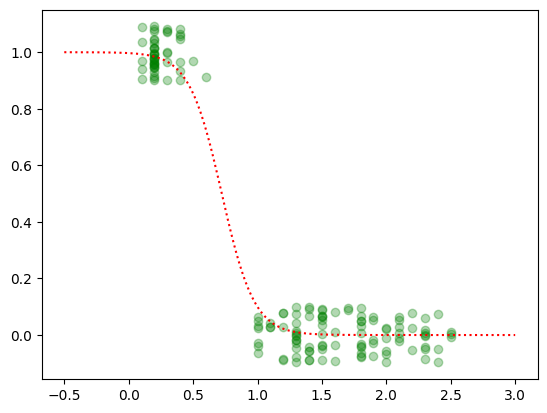

In [169]:
plt.plot(pw, yJitter, 'og', alpha=0.3)
plt.plot(xNew, yMod, ':r')
plt.show()

In [176]:
p_train = sigmoid(X @ theta)
y_hat = (p_train >= 0.5).astype(int)  # 0.5 is default; tune if needed
acc = (y_hat == y).mean()
print(f"Train accuracy: {acc:.3f}")

Train accuracy: 1.000
